# Projeto Aplicado

Aluno: Gustavo Guarizzo

In [27]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [28]:
# Carregando dados
df = pd.read_csv('Projeto_Aplicado2/CHATGPT.csv')  

# Análise Exploratoria

                                              Review     label
0  up to this point i ’ ve mostly been using chat...  NEGATIVE
1  i ’ ve been a user since it ’ s initial roll o...  NEGATIVE
2  this app would almost be perfect if it wasn ’ ...  NEGATIVE
3  i recently downloaded the app and overall, it'...  POSITIVE
4  i appreciate the devs implementing siri suppor...  NEGATIVE
label
NEGATIVE    1264
POSITIVE    1028
Name: count, dtype: int64


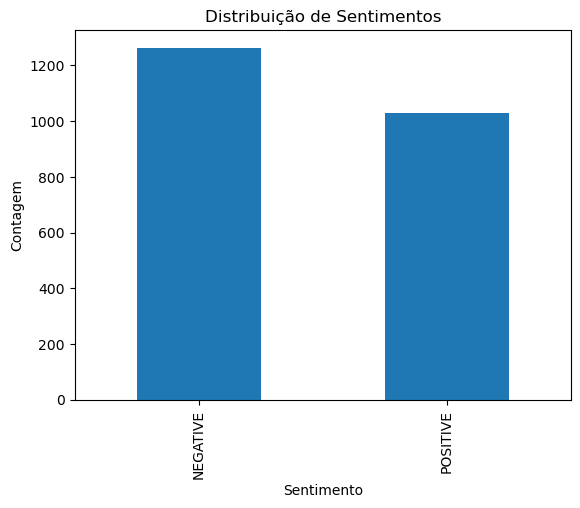

In [30]:
# Visualizando as primeiras linhas do dataset
print(df.head())

# Verificando a distribuição dos labels
print(df['label'].value_counts())

# Contagem de reviews por sentimento

df['label'].value_counts().plot(kind='bar', title='Distribuição de Sentimentos', xlabel='Sentimento', ylabel='Contagem')
plt.show()


# Preparação dos Dados
* Transformar os labels em valores binários (0 e 1) e remoção de valores nulos.

In [32]:
# Removendo as linhas com valores NaN na coluna 'Review' e 'label'
df = df.dropna(subset=['Review'])
df = df.dropna(subset=['label'])

In [33]:
# Mapeando os labels para valores binários (0 = NEGATIVE, 1 = POSITIVE)
df['label'] = df['label'].map({'NEGATIVE': 0, 'POSITIVE': 1})

# Separando as features (Review) e o target (label)
X = df['Review']
y = df['label']

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformando os textos em vetores numéricos usando TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# Treinamento do Modelo (Logistic Regression)

In [35]:
# Modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test_tfidf)

# Avaliação do Modelo

In [37]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório de classificação detalhado
print(classification_report(y_test, y_pred, target_names=['NEGATIVE', 'POSITIVE']))

Acurácia: 0.84
              precision    recall  f1-score   support

    NEGATIVE       0.84      0.88      0.86       249
    POSITIVE       0.85      0.79      0.82       201

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



# Gráfico

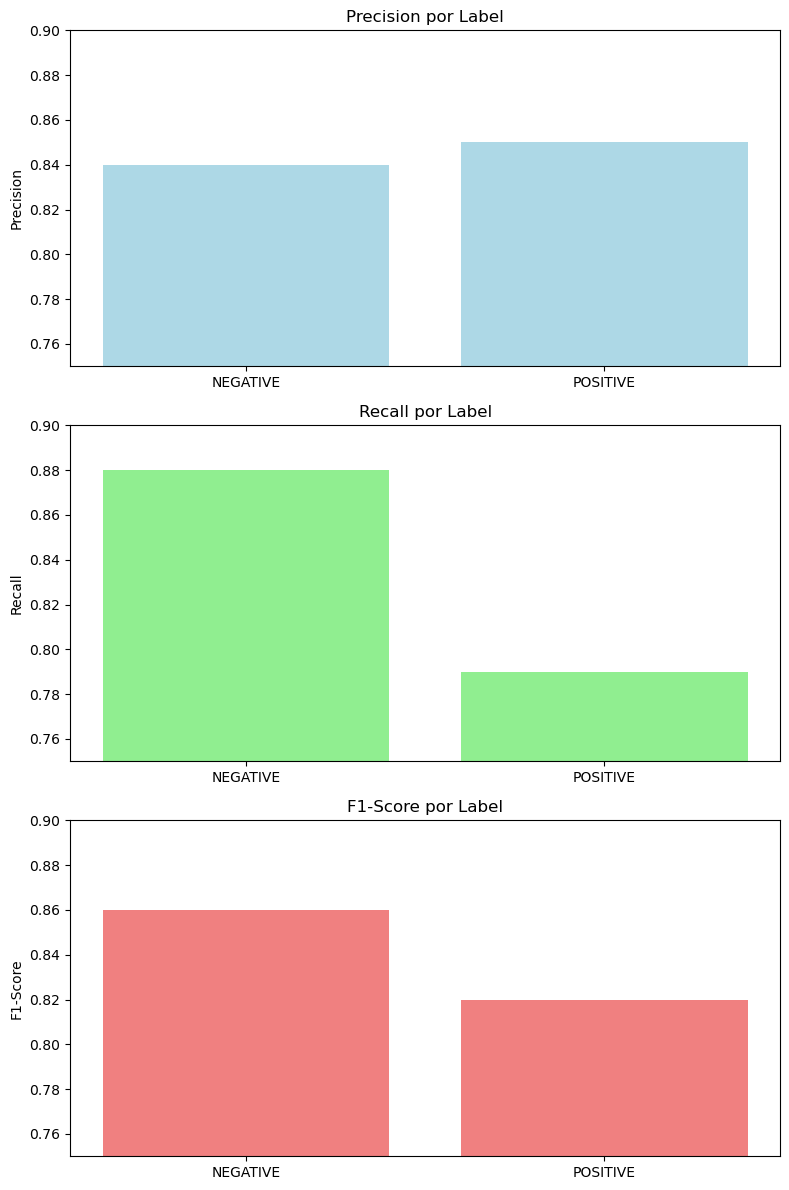

In [46]:
# Dados para os gráficos
labels = ['NEGATIVE', 'POSITIVE']
precision = [0.84, 0.85]
recall = [0.88, 0.79]
f1_score = [0.86, 0.82]
support = [249, 201]

# Criando a figura
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Gráfico de Precision
ax[0].bar(labels, precision, color='lightblue')
ax[0].set_title('Precision por Label')
ax[0].set_ylabel('Precision')
ax[0].set_ylim([0.75, 0.9])

# Gráfico de Recall
ax[1].bar(labels, recall, color='lightgreen')
ax[1].set_title('Recall por Label')
ax[1].set_ylabel('Recall')
ax[1].set_ylim([0.75, 0.9])

# Gráfico de F1-Score
ax[2].bar(labels, f1_score, color='lightcoral')
ax[2].set_title('F1-Score por Label')
ax[2].set_ylabel('F1-Score')
ax[2].set_ylim([0.75, 0.9])

# Ajustar layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()
